In [11]:
# Project's [example](https://github.com/ahmedfgad/GeneticAlgorithmPython/tree/3.3.1?tab=readme-ov-file#example) on GitHub

import pygad
import numpy

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(ga_instance, solution, solution_idx):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 100 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 50 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
# def callback_generation(ga_instance):
#     
#     # TODO:
#     # Improve this logging so it will be a table like given information about the execution time and other interesting
#     # algorithm parameters
#     
#     global last_fitness
#     print(f"Generation = {ga_instance.generations_completed}")
#     print(f"Fitness    = {ga_instance.best_solution()[1]}")
#     print(f"Change     = {ga_instance.best_solution()[1] - last_fitness}")
#     last_fitness = ga_instance.best_solution()[1]
    
# Create a timeit wrapper


# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       on_generation=None,
                       save_solutions=True,
                       save_best_solutions=True,
                       # parallel_processing=["thread", 4],
                       parallel_processing=('thread', 4),
                       )

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
# ga_instance.plot_fitness()
# ga_instance.show_group_plot()
# 
# # Returning the details of the best solution.
# solution, solution_fitness, solution_idx = ga_instance.best_solution()
# print(f"Parameters of the best solution : {solution}")
# print(f"Fitness value of the best solution = {solution_fitness}")
# print(f"Index of the best solution : {solution_idx}")
# 
# prediction = numpy.sum(numpy.array(function_inputs)*solution)
# print(f"Predicted output based on the best solution : {prediction}")
# 
# if ga_instance.best_solution_generation != -1:
#     print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")
# 
# # Saving the GA instance.
# filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
# ga_instance.save(filename=filename)
# 
# # Loading the saved GA instance.
# loaded_ga_instance = pygad.load(filename=filename)
# loaded_ga_instance.plot_fitness()

Time taken by run function: 0.741 seconds


In [17]:
# Save model

ga_instance.save("results/example_export")
ga_instance_loaded = pygad.load("results/example_export")

In [7]:
solutions = ga_instance.solutions
best_solutions = ga_instance.best_solutions

print(f"{ga_instance.generations_completed=}")

ga_instance.generations_completed=100


In [ ]:
len(ga_instance.solutions)

assert ga_instance.num_genes == len(ga_instance.solutions[0])

# Seems like actually not num_generations are being evalutaed, but typical python error since index starts from 0, num_generations + 1 are evaluated
assert len(ga_instance.solutions) == ga_instance.sol_per_pop * (ga_instance.num_generations+1), "Number of solutions should be equal to the number of generations times the number of solutions per population"

In [8]:
ga_instance.__dict__

{'logger': <Logger pygad.pygad (DEBUG)>,
 'random_seed': None,
 'suppress_warnings': False,
 'mutation_by_replacement': False,
 'allow_duplicate_genes': True,
 'gene_space_nested': False,
 'gene_space': None,
 'init_range_low': -4,
 'init_range_high': 4,
 'gene_type': [float, None],
 'gene_type_single': True,
 'gene_names': None,
 'gene_space_unpacked': None,
 'num_genes': 6,
 'sol_per_pop': 50,
 'pop_size': (50, 6),
 'population': array([[ 0.8302568 ,  0.43264599,  0.02812539, -4.00404461, -3.96490606,
         -3.79838478],
        [ 0.8302568 ,  0.43264599,  0.02812539, -3.10449498, -3.96490606,
         -3.71710518],
        [ 0.8302568 ,  0.35376539,  0.40504896, -3.97872622, -3.96490606,
         -3.81987408],
        [ 1.00649189,  0.63280581,  0.02812539, -4.30974146, -4.00020403,
         -3.79838478],
        [ 0.8302568 ,  0.35376539,  0.10685304, -3.64568132, -4.00020403,
         -3.79838478],
        [ 1.00649189,  0.42246665,  0.02812539, -4.0436341 , -4.93515763,
      

In [9]:
ga_instance.best_solutions_fitness

[0.6514285227673878,
 0.8343825288206579,
 4.16243658807195,
 28.67790293625313,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 472.8306048499808,
 652.4742288314563,
 652.4742288314563,
 652.4742288314563,
 652.4742288314563,
 652.4742288314563,
 652.4742288314563,
 652.4742288314563,
 652.4742288314563,
 652.4742288314563,
 652.4742288314563,
 652.4742288314563,
 652.4742288314563,
 652.4742288314563,
 3065.706367802404,
 3065.706367802404,
 3065.706367802404,

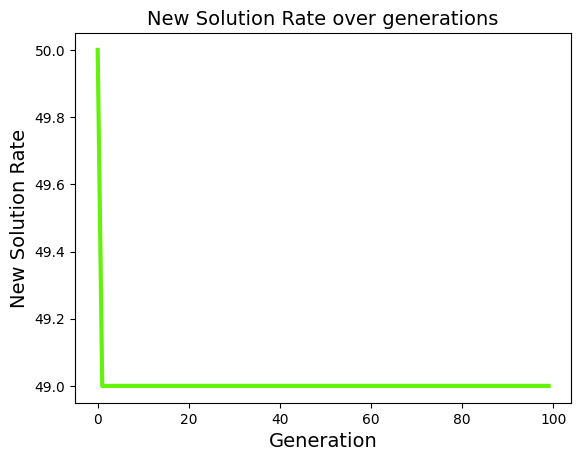

/tmp/ipykernel_111592/3327282119.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


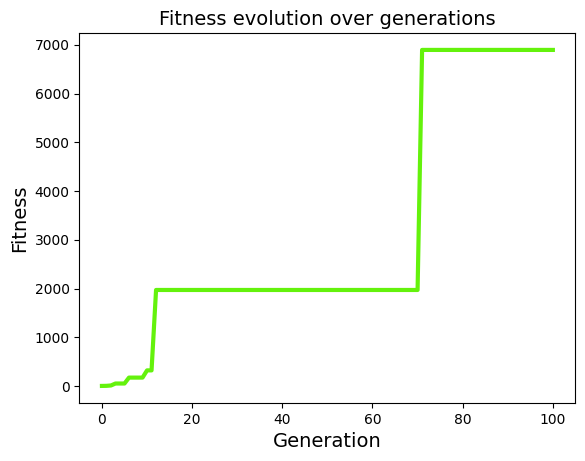

In [12]:
ga_instance.plot_new_solution_rate();

fig = ga_instance.plot_fitness(show_plot=False)
fig.show()

/tmp/ipykernel_111592/1687459775.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


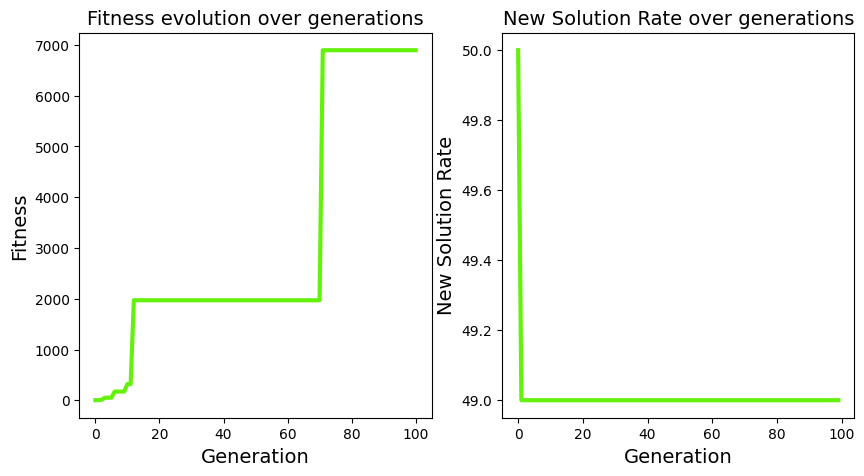

In [14]:
# Create a subplot with two cols
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

ga_instance.plot_fitness(show_plot=False, ax=axs[0])
ga_instance.plot_new_solution_rate(show_plot=False, ax=axs[1])

fig.show()

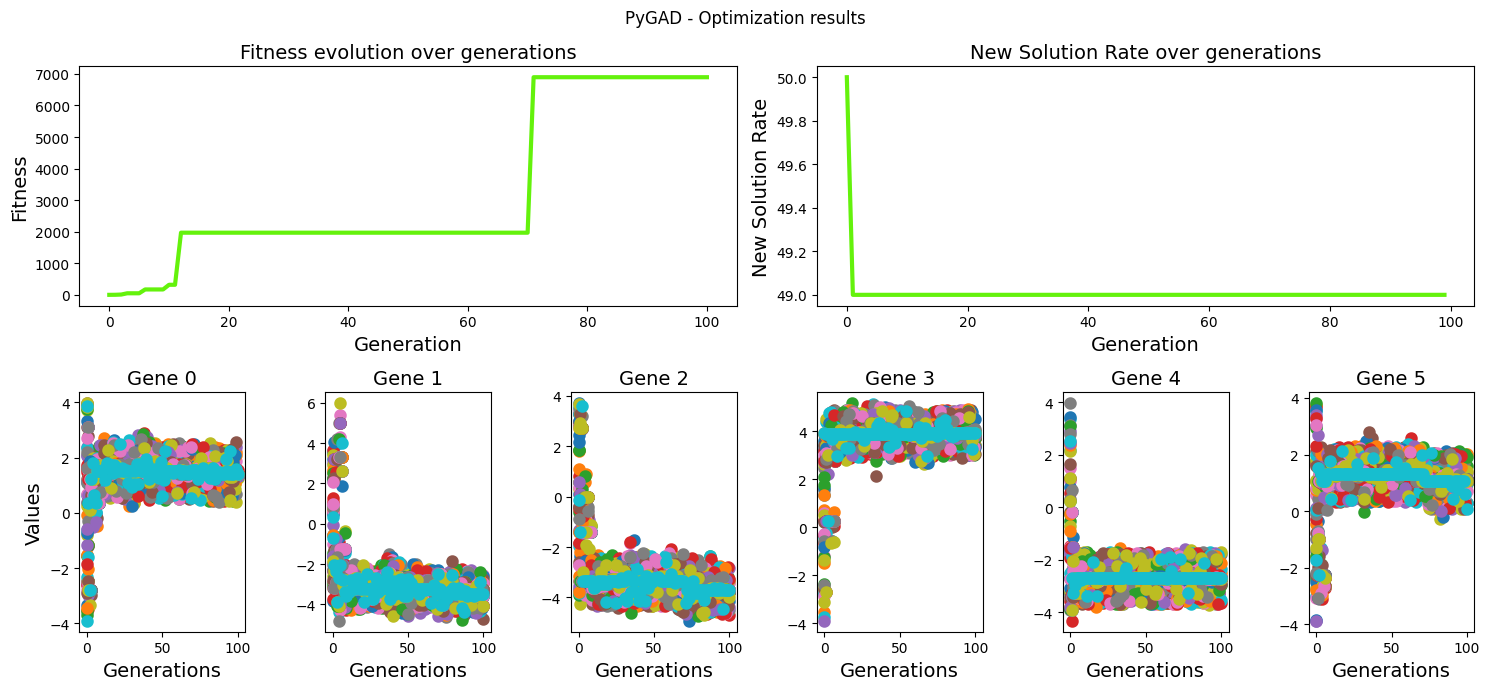

In [15]:
ga_instance.grouped_plot(orientation="horizontal");